In [1]:
import numpy as np
import pandas as pd
import quandl as qd
import matplotlib.pyplot as plt
from matplotlib import style
import math
import sklearn
from sklearn import preprocessing, cross_validation, svm
import statistics as stat 

C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('population.csv',delimiter=';')
print (df)

    Year  Population
0   2007     9182927
1   2008     9256347
2   2009     9340682
3   2010     9415570
4   2011     9482855
5   2012     9555893
6   2013     9644864
7   2014     9747355
8   2015     9851017
9   2016     9995153
10  2017    10120242
11  2018    10230185
12  2006     9113257
13  2005     9047752
14  2004     9011392
15  2003     8975670
16  2002     8940788
17  2001     8909128
18  2000     8882792
19  1999     8861426


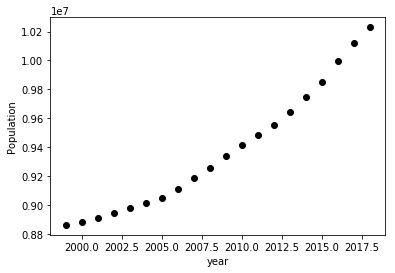

[[-1.11392409]
 [ 0.70472748]
 [-0.2045983 ]
 [ 1.79591843]
 [ 1.25032296]
 [-1.65951956]
 [-0.02273314]
 [-0.38646346]
 [-0.56832862]
 [ 0.88659264]
 [-1.29578924]
 [ 0.52286233]
 [ 0.15913201]
 [ 0.34099717]
 [-1.4776544 ]
 [ 1.0684578 ]]
[[-1.11392409]
 [ 0.70472748]
 [-0.2045983 ]
 [ 1.79591843]
 [ 1.25032296]
 [-1.65951956]
 [-0.02273314]
 [-0.38646346]
 [-0.56832862]
 [ 0.88659264]
 [-1.29578924]
 [ 0.52286233]
 [ 0.15913201]
 [ 0.34099717]
 [-1.4776544 ]
 [ 1.0684578 ]]


In [5]:
X = np.array(df.drop(['Population'], 1),dtype=float)
y = np.array(df['Population'])
plt.scatter(X,y,color='k')
plt.xlabel('year')
plt.ylabel('Population')
plt.show()
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
X_train,mean,std=featureNormalize(X_train)
print(X_train)

In [8]:
# b=np.ones(X.shape[0])
X_train=np.c_[np.ones(X_train.shape[0]),X_train]
meany = np.mean(y_train)
stdy = np.std(y_train)
y_train = (y_train-meany)/stdy
print(y_train)
print(X_train.shape,stdy,meany)

[-1.04835781e+00  5.61194747e-01 -4.14749813e-01  2.32562263e+00
  1.33344922e+00 -1.25602530e+00 -2.22630827e-01 -5.97056129e-01
 -7.68463840e-01  7.94006219e-01 -1.13120291e+00  3.70075345e-01
 -1.95043161e-03  1.94009887e-01 -1.20011663e+00  1.06219564e+00]
(16, 2) 382159.0029442711 9341427.375


In [9]:
theta=np.array(np.zeros(X_train.shape[1]))
iterations=1000
alpha=0.1
print(theta.shape)
j_history = np.array(np.zeros(iterations))
theta,j_history=gradientDescent(X_train,y_train,alpha,theta,iterations,j_history)

(2,)


In [7]:
def computeCost(X,y,theta):
    m=y.shape[0]
    j=(1/(2*m))*np.sum(np.square(np.dot((theta.T),(X.T))-(y.T)))
    return j

In [6]:
def gradientDescent(X,y,alpha,theta,num_iters,j_history):
    m=y.shape[0]
    for i in range(num_iters):
        theta=theta-(((alpha)*np.dot((np.dot((theta.T),(X.T))-(y.T)),X))/m).T
#         print (theta)
        j_history[i] = (computeCost(X,y,theta))    
    return theta,j_history

In [4]:
def featureNormalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X=(X-mean)/std
    print (X)
    return X,mean,std
    

In [10]:
print (theta.shape)

(2,)


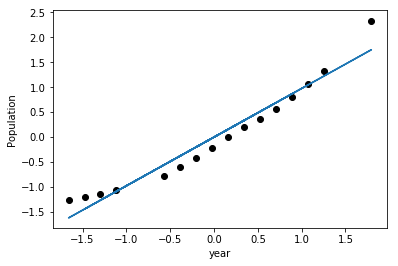

In [11]:
plt.scatter(X_train[:,[1]],y_train,color='k')
plt.xlabel('year')
plt.ylabel('Population')
plt.plot(X_train[:,[1]],np.dot(theta.T,X_train.T))
plt.show()

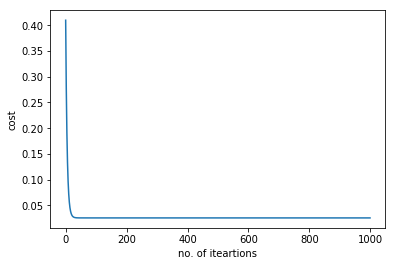

In [12]:
no_iteration = np.array(np.zeros(iterations))
for i in range(iterations):
    no_iteration[i]=i
plt.plot(no_iteration,j_history)
plt.xlabel('no. of iteartions')
plt.ylabel('cost')
plt.show()

In [32]:
# print(X_test[0],y_test[0])
predicted_val = predict(theta[1],(X_test[0]-mean)/std,y_test[0])
print(predicted_val,y_test[0])

[9062146.47984496]
[9062146.47984496] 9011392


In [30]:
def predict(theta,x,y):
#     print(stdy,meany)
#     ans =((((theta*x)*stdy)+meany)/y)*100
    ans = (((theta*x)*stdy)+meany)
#     print(ans)
    return ans